# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable. 
 

# Lib 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Load the data 

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
x = pd.DataFrame(boston.data,columns=boston.feature_names)
x.shape

(506, 13)

In [5]:
x.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.filename

'C:\\Users\\CHALLA\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [8]:
y = pd.DataFrame(boston.target,columns=['Price'])
y.shape

(506, 1)

In [9]:
y.head(3)

,Price
0,24.0
1,21.6
2,34.7


In [10]:
x.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [11]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## univariate analysis

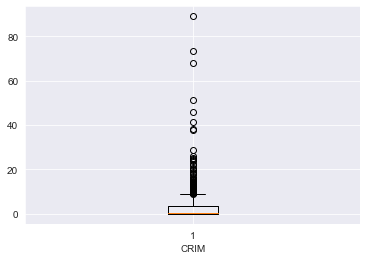

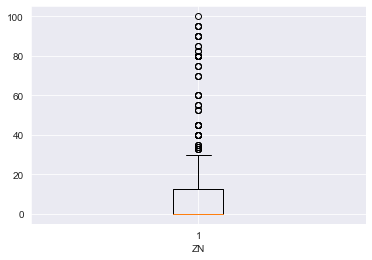

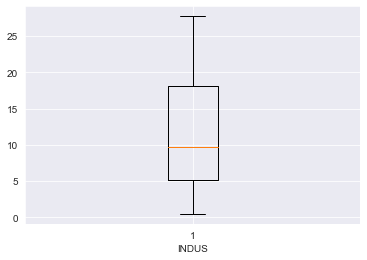

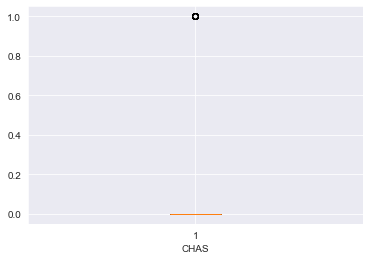

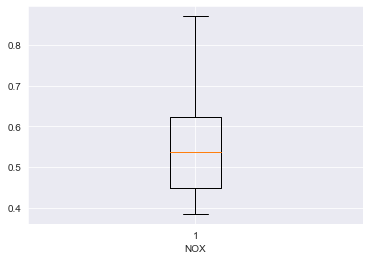

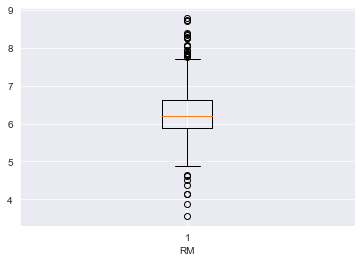

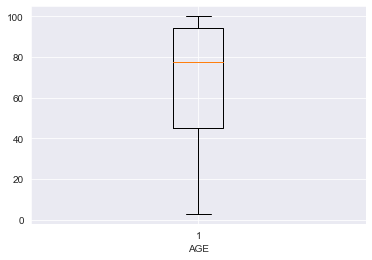

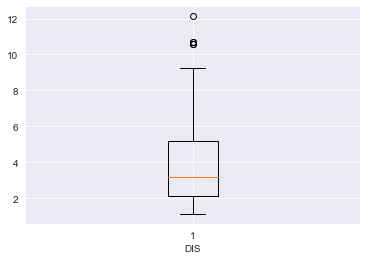

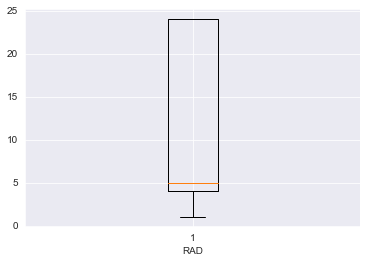

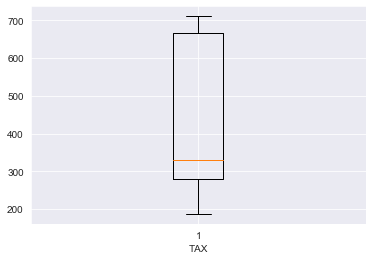

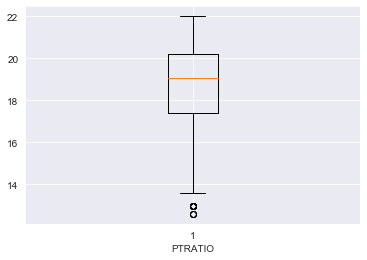

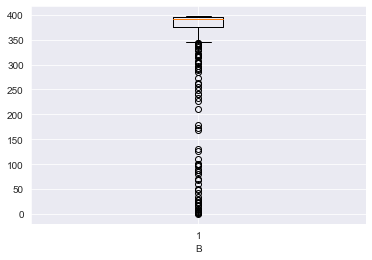

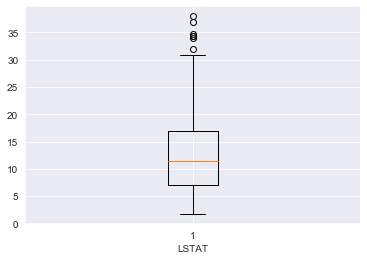

In [13]:
for i in x:
    plt.boxplot(x[i])
    plt.xlabel(i)
    plt.show()

## Bivariate analysis

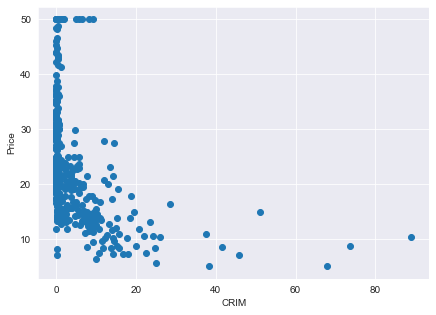

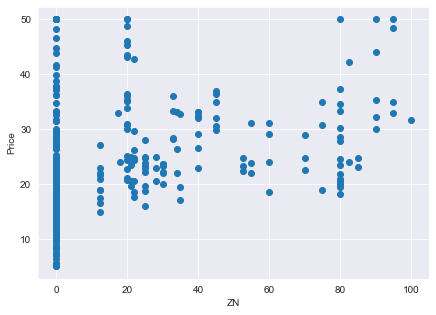

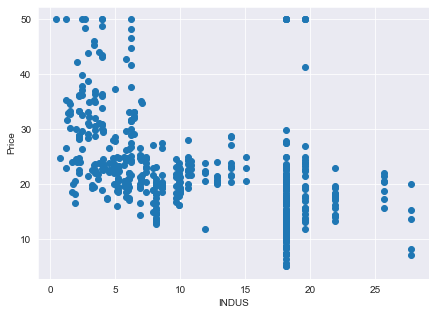

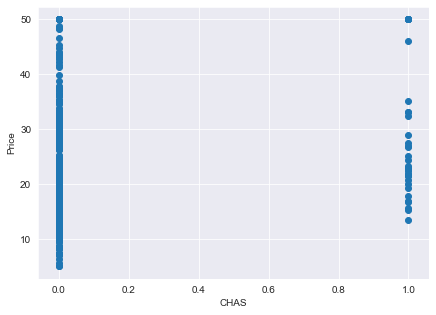

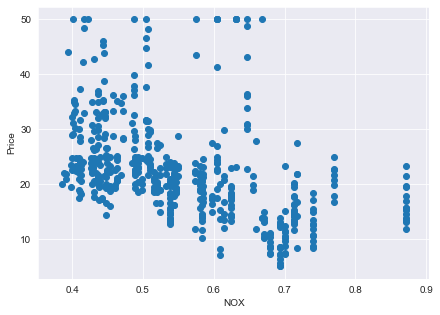

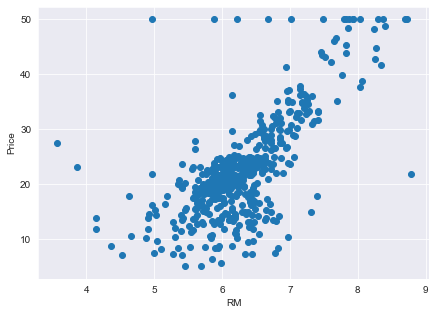

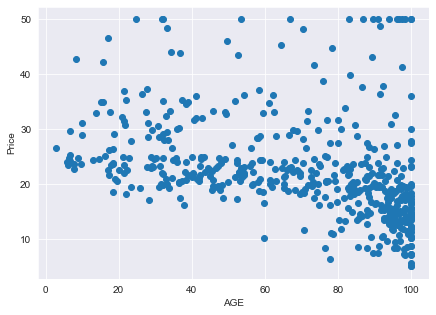

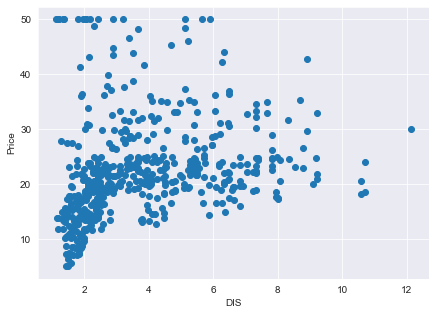

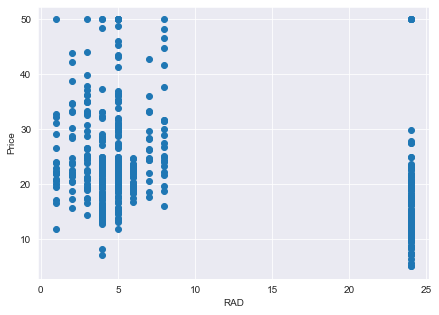

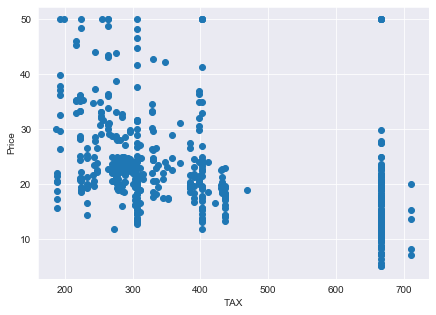

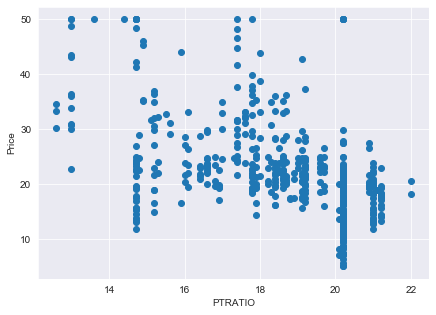

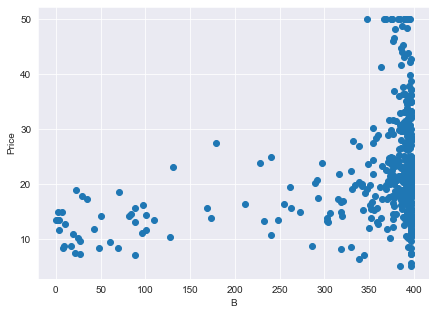

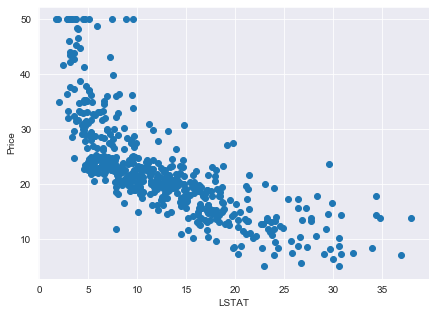

In [14]:

for i in x:
    plt.figure(figsize=(7,5))
    plt.scatter(x[i],y)
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

## Multivariate analysis

In [15]:
#sns.pairplot(x)

In [16]:
x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


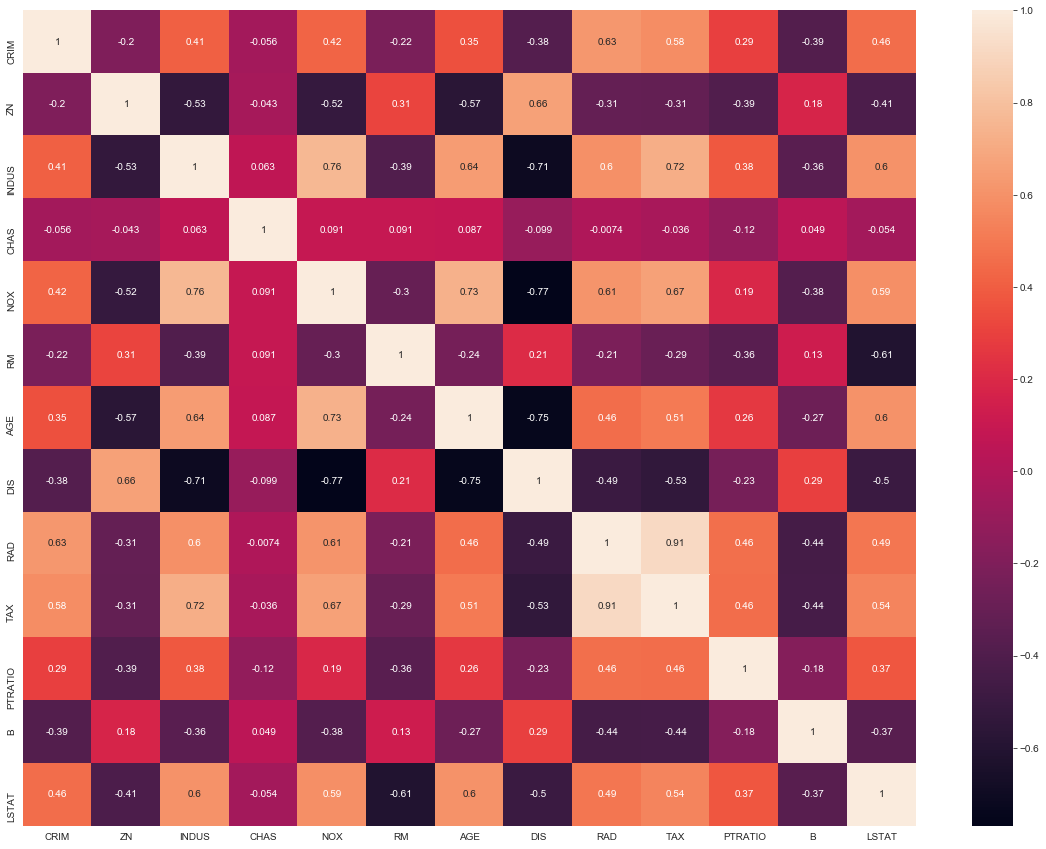

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(x.corr(),annot=True)

## Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()

In [20]:
ss_x= ss.fit_transform(x)
ss_y= ss.fit_transform(y)

In [21]:
x1 = pd.DataFrame(x,columns=x.columns)
y1 = pd.DataFrame(y,columns=y.columns)

In [22]:
x = x1
y = y1

In [23]:
x.shape,y.shape

((506, 13), (506, 1))

## Split of data 

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

In [25]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

## Model Building

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
model = lr.fit(X_train,Y_train)


In [29]:
model.intercept_

array([40.21892901])

In [30]:
model.coef_

array([[-8.85049752e-02,  5.02928536e-02,  2.03483110e-02,
         3.75427054e+00, -1.77483714e+01,  3.24776492e+00,
         1.20008182e-02, -1.40916141e+00,  2.63880691e-01,
        -1.03440009e-02, -9.51780874e-01,  6.11600491e-03,
        -5.97133217e-01]])

In [31]:

coef_df = pd.DataFrame(model.coef_,columns=x.columns)
coef_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.088505,0.050293,0.020348,3.754271,-17.748371,3.247765,0.012001,-1.409161,0.263881,-0.010344,-0.951781,0.006116,-0.597133


In [32]:
test_predict=model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('AME:',mean_absolute_error(Y_test,test_predict))
print('MSE:',mean_squared_error(Y_test,test_predict))
print('RMSE:', np.sqrt(mean_squared_error(Y_test,test_predict)))
print('R Square:',r2_score(Y_test,test_predict))


AME: 3.835696361418929
MSE: 28.547585271468172
RMSE: 5.342994036256092
R Square: 0.7123963332666869


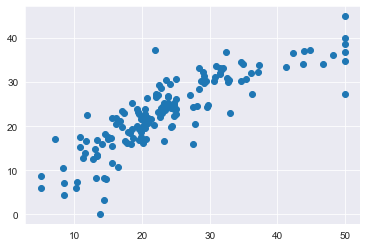

In [33]:
plt.scatter(Y_test,test_predict)

## Backward selection

In [34]:
x.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [35]:
x = x[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))




MSE: 31.191363685496178
R Square: 0.6857614932732399


In [36]:
x = x[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))


MSE: 35.06436743022552
R Square: 0.6467427788123259


In [37]:
x = x[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))


MSE: 35.76910412557404
R Square: 0.6396428838216863


In [38]:
x = x[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))


MSE: 35.66477604302683
R Square: 0.6406939408129697


In [39]:
x = x[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))


MSE: 39.97459079120771
R Square: 0.5972745583071938


In [40]:
x = x[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))


MSE: 40.16177993537101
R Square: 0.5953887145931953


In [41]:
x = x[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))


MSE: 69.51544112810949
R Square: 0.29966420722070997


In [42]:
x = x[['CRIM', 'ZN', 'INDUS', 'CHAS']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))


MSE: 69.80813765235882
R Square: 0.29671542564028175


In [43]:
x = x[['CRIM', 'ZN', 'INDUS']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))


MSE: 69.89769509533342
R Square: 0.29581317598456414


In [44]:
x = x[['CRIM', 'ZN']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))


MSE: 77.33633621944396
R Square: 0.22087232048090777


In [45]:
x = x[['CRIM']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

model1 = lr.fit(X_train,Y_train)

test_predict1=model1.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MSE:',mean_squared_error(Y_test,test_predict1))
print('R Square:',r2_score(Y_test,test_predict1))


MSE: 85.3016072087895
R Square: 0.14062591360355137


In [46]:
import statsmodels.api as sm

In [47]:
x1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [48]:
x2 = x1[[ 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO','LSTAT']]

In [49]:
x = sm.add_constant(x2)
model1 = sm.OLS(y,x).fit()
y_prediction = model1.predict(x)

In [50]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     141.9
Date:                Fri, 01 May 2020   Prob (F-statistic):          4.36e-131
Time:                        08:45:31   Log-Likelihood:                -1518.0
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     496   BIC:                             3098.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5398      5.032      8.256      0.0